In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
problem_name = 'benchmark'

In [3]:
directories = glob.glob('mesh_test/' + problem_name + '*')
scheme_dictionary = {}
scheme_iterations = {}
scheme_time = {}

In [4]:
for directory in directories:
    files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))
    
    scheme = directory.replace('mesh_test/' + problem_name + '_', '')
    scheme_dictionary[scheme] = []


    for file in files:
        scheme_dictionary[scheme].append( file )
    
    scheme_dictionary[scheme].sort()

In [5]:
for scheme in scheme_dictionary:
    scheme_iterations[scheme] = []

    for file in scheme_dictionary[scheme]:
        with open(file, 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            scheme_iterations[scheme].append(sum(1 for row in lines))

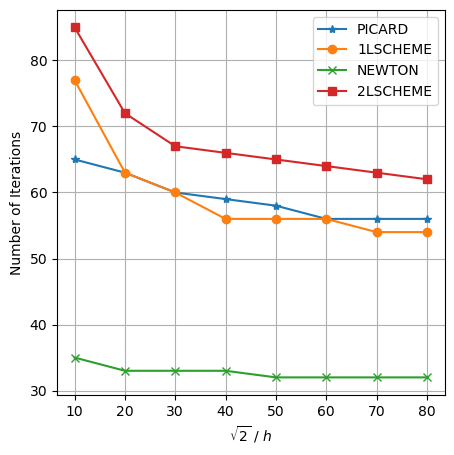

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
names = []
symbols = ['-*', '-o', '-x', '-s']

for scheme, symbol in zip(scheme_iterations, symbols):

    values = scheme_iterations[scheme]

    ax.plot(range(10, 10*len(values)+1, 10), values, symbol)
    ax.set_ylabel('Number of Iterations')
    ax.set_xlabel('$\sqrt{2}$ / $h$')

    names.append(scheme.replace('_', ''))

ax.legend(names)
ax.grid()

In [7]:
for directory in directories:
    scheme = directory.replace('mesh_test/' + problem_name + '_', '')
    file = glob.glob(os.path.join(directory, problem_name +'*.csv'))[0]

    scheme_time[scheme] = []

    with open(file, 'r') as csvfile:
        lines = list(csv.reader(csvfile, delimiter=','))
        for row in lines[1:]:
            scheme_time[scheme].append(float(row[-1]))   

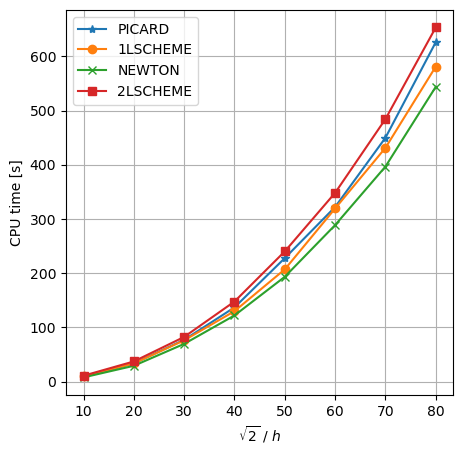

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
names = []
symbols = ['-*', '-o', '-x', '-s']

for scheme, symbol in zip(scheme_time, symbols):
    values = scheme_time[scheme]

    ax.plot(range(10, 10*len(values)+1, 10), values, symbol)
    ax.set_ylabel('CPU time [s]')
    ax.set_xlabel('$\sqrt{2}$ / $h$')

    names.append(scheme.replace('_', ''))

ax.legend(names)
ax.grid()

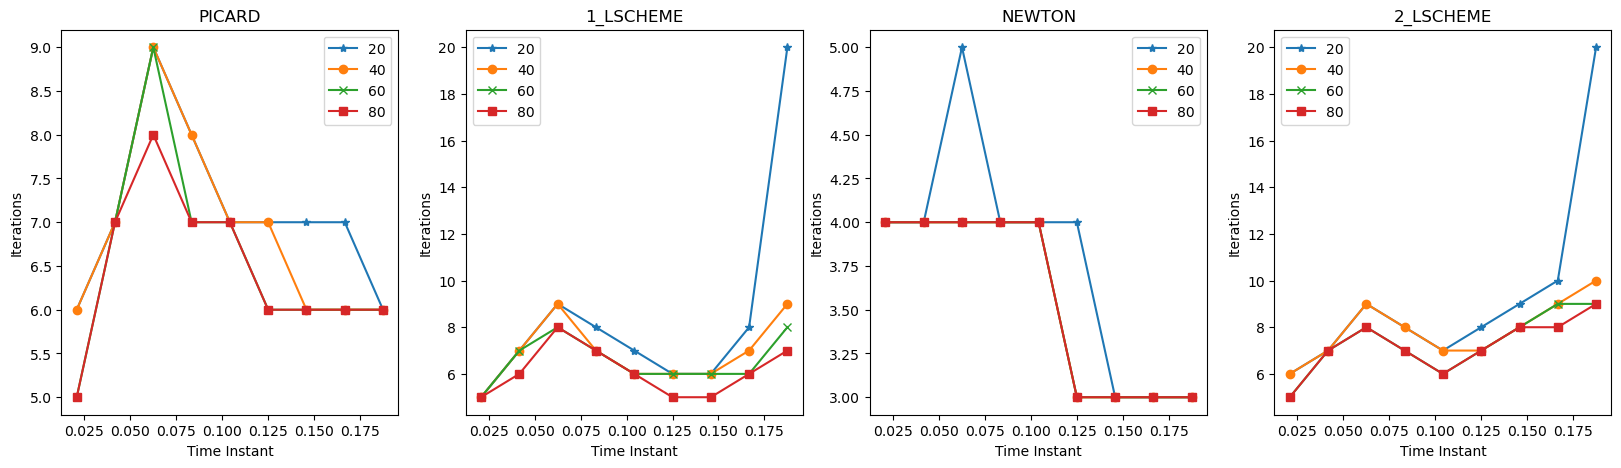

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=len(scheme_dictionary), figsize=(5 * len(scheme_dictionary), 5))
symbols = ['-*', '-o', '-x', '-s']

i = 0
for scheme_name in scheme_dictionary:
    ax[i].set_title(scheme_name)

    tss = []
    counters = []

    for j in range(4):
        tss.append([])
        counters.append([])

        res_plot = []

        with open(scheme_dictionary[scheme_name][j], 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            next(lines)

            for line in lines:
                res_plot.append([])
                for val in line:
                    res_plot[-1].append(float(val))
        


        tss[-1].append(res_plot[0][0])
        counters[-1].append(0)
        for row in res_plot:
            if tss[-1][-1] == row[0]:
                counters[-1][-1] = counters[-1][-1] + 1
            else:

                tss[-1].append( row[0] )
                counters[-1].append( 1 )
    
    for ts, counter, symbol in zip(tss, counters, symbols):
        ax[i].plot(ts, counter, symbol)
    ax[i].legend(['20', '40', '60', '80'])
    ax[i].set_ylabel('Iterations')
    ax[i].set_xlabel('Time Instant')
    
    i = i + 1